Face Mask Detector For COVID-19

In [1]:
import keras
import PIL
import numpy as np
import cv2
import random
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
classifier=Sequential()

In [4]:
# step 1: convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

In [5]:
# step 2:pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

# adding another convolutional layer to imoprove the accuracy
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2)))

In [6]:
#step 3:flattening
classifier.add(Flatten())

In [7]:
# step 4: full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.6))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [8]:
# compiling
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
#fit cnn to images
from keras.preprocessing.image import ImageDataGenerator
training_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
testing_datagen = ImageDataGenerator(rescale=1./255)

training_set = training_datagen.flow_from_directory('/content/gdrive/My Drive/dataset', 
                                                    target_size=(64,64), 
                                                    batch_size=32, 
                                                    class_mode='binary')


Found 1010 images belonging to 2 classes.


In [10]:
test_set = testing_datagen.flow_from_directory('/content/gdrive/My Drive/test_set',
                                                target_size=(64,64), 
                                                batch_size=32,
                                                class_mode='binary')

Found 3 images belonging to 2 classes.


In [11]:
classifier.fit_generator(training_set, 
                         steps_per_epoch=100/8, 
                         epochs=8, 
                         validation_data=test_set, 
                         validation_steps=8/8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/8
12/12 [==============================] - 147s 12s/step - loss: 0.6349 - accuracy: 0.6517 - val_loss: 0.8141 - val_accuracy: 0.3333
Epoch 2/8
12/12 [==============================] - 64s 5s/step - loss: 0.5529 - accuracy: 0.7114 - val_loss: 0.6559 - val_accuracy: 0.3333
Epoch 3/8
12/12 [==============================] - 45s 4s/step - loss: 0.4166 - accuracy: 0.7933 - val_loss: 0.4133 - val_accuracy: 1.0000
Epoch 4/8
12/12 [==============================] - 32s 3s/step - loss: 0.2939 - accuracy: 0.8918 - val_loss: 0.1503 - val_accuracy: 1.0000
Epoch 5/8
12/12 [==============================] - 13s 1s/step - loss: 0.2168 - accuracy: 0.9328 - val_loss: 0.0829 - val_accuracy: 1.0000
Epoch 6/8
12/12 [==============================] - 11s 803ms/step - loss: 0.1500 - accuracy: 0.9495 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 7/8
12/12 [==============================] - 7s 552ms/step - loss: 0.1507 - accuracy: 0.9447 - val_loss: 0.0710 - val_accuracy: 1.0000
Epoch 8/8
12/12 [===

In [12]:
test_pred = classifier.predict(test_set)>0.5
test_pred

array([[False],
       [ True],
       [ True]])

In [13]:
# predictions for with_mask image using train model
import numpy as np
from keras.preprocessing import image
tested_image = image.load_img('/content/gdrive/My Drive/test_set/test_mask/augmented_image_296.jpg',target_size=(64,64))
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims(tested_image,axis = 0)
output = classifier.predict(tested_image)
training_set.class_indices
if output[0][0] ==1:
  prediction = 'without mask'
  print(prediction )
else:
  prediction = 'with mask'
  print(prediction )

with mask


In [ ]:
import numpy as np
from keras.preprocessing import image
tested_image = image.load_img('/content/gdrive/My Drive/test_set/test_withoutmask/augmented_image_319.jpg',target_size=(64,64))
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims(tested_image,axis = 0)
output = classifier.predict(tested_image)
training_set.class_indices
if output[0][0] ==1:
  prediction = 'without mask'
  print(prediction )
else:
  prediction = 'with mask'
  print(prediction )

without mask


In [ ]:
eye_cascade= cv2.CascadeClassifier('/content/gdrive/MyDrive/Copy of haarcascade_eye.xml')
face=cv2.CascadeClassifier('/content/gdrive/MyDrive/face-mask-dataset/Dataset/haarcascade/haarcascade_frontalface_default (1).xml')
mouth=cv2.CascadeClassifier('/haarcascade_smile.xml')

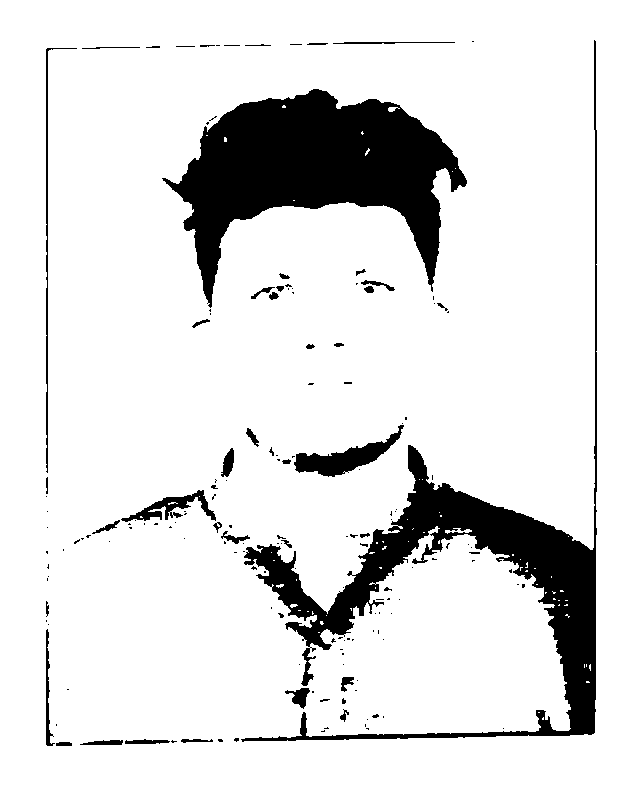

In [ ]:
test_image = cv2.imread('/1639502666379.jpg')
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
bw_threshold=80
(thresh,black_and_white)=cv2.threshold(gray,bw_threshold,255,cv2.THRESH_BINARY)
from google.colab.patches import cv2_imshow
cv2_imshow(black_and_white)

In [ ]:
eyes= eye_cascade.detectMultiScale(black_and_white,1.1,4)
f = face.detectMultiScale(gray, 1.1, 4)
face_bw=face.detectMultiScale(black_and_white,1.1,4)

error: ignored

In [ ]:
font=cv2.FONT_HERSHEY_SIMPLEX
org=(30,30)
weared_mask_font_color=(55,25,155)
not_weared_mask_font_color=(10,60,55)
thickness=1
font_scale=0.5
weared_mask="Mask Detected"
not_weared_mask="Not Mask Detected"

In [ ]:
len(f)

2

In [ ]:
len(face_bw)

0

In [ ]:
len(mouth_rects)

NameError: ignored

In [ ]:
if(len(f)==0 and len(face_bw)==0):
  cv2.putText(test_image,"Mask Detected",org,font,font_scale,weared_mask_font_color,thickness,cv2.LINE_AA)
elif(len(f)==0 and len(face_bw)==1):
  cv2.putText(test_image,org,font,font_scale,weared_mask_font_color,thickness,cv2.LINE_AA)
  print("Not Found")
elif len(f)>0 :
  if (len(face_bw)==0 or len(face_bw)>1):
    if  len(mouth_rects)==0 or len(mouth_rects):
      cv2.putText(test_image,weared_mask,org,font,font_scale,weared_mask_font_color,thickness,cv2.LINE_AA)
    elif len(mouth_rects)>0 and y<my<y+h:
      for(mx,my,mw,mh) in mouth_rects:
        cv2.putText(test_image,not_weared_mask,org,font,font_scale,not_weared_mask_font_color,thickness,cv2.LINE_AA) 
        cv2.rectangle(test_image,(mx,my),(mx+mh,my+mw),(0,0,255),5)
        break    

cv2_imshow(test_image)       

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
